In [356]:
# -*- coding:utf-8 -*-
import os
import json
import pandas as pd
import numpy as np
from collections import Counter
sourse_path = r"address\Wuhan2020分组意向.xlsx"
data = pd.read_excel(sourse_path)
slack_email = pd.read_json(r"address\data.json")

# 选择数据列

In [289]:
#master
prefession_dict = Counter(data["您的工作（工作类型，职位）"])

In [324]:
#fork1
prefession_dict = Counter(data["您所擅长的领域"])

In [300]:
#fork2
prefession_dict = Counter(data["您的专业、学历和工作年限（比如：控制工程-硕士-2年）"])

# 根据库分类

In [275]:
#master，按照职业进行划分
prefess_all = {}
students_dict = {'学生': ['学生','學生','本科', '研究生', '硕士', '博士', '大四', '在读', '大学', '应届','大三']}
engineer_dict = {'工程师': ['算法', 'python', 'Python', '工程师', '人工智能', 'AI', '数据', '分析', '研发']}
program_dict = {'程序员': ['JAVA', 'IT', '互联网', '软件', '硬件', '后台', '运营', 'it', 'java', 'Java', '开发', '前端']}
designer_dict = {'设计师': ['设计', 'UI', 'UX']}
prefess_all.update(program_dict)
prefess_all.update(engineer_dict)
prefess_all.update(students_dict)
prefess_all.update(designer_dict)

In [7]:
#fork1，区别公司
prefess_all = {}
students_dict = {'京东': ['京东',"京东云"]}
engineer_dict = {'阿里': ['阿里', '阿里巴巴']}
program_dict = {'石墨': ['石墨',"石墨文档"]}
designer_dict = {'普华永道': ['普华永道']}
prefess_all.update(program_dict)
prefess_all.update(engineer_dict)

In [301]:
#fork2，区别学历
prefess_all = {}
students_dict = {'学生': ['学生','应届']}
junior_dict = {'大专':['大专','高中','高','中专']}
undergraduate_dict = {'本科': ['本科','本','学士','大学生', '大三', '大四', '大一', '大二']}
graduate_dict = {'研究生': ['研究生', '硕士', '研一', '研二', '研三', '读研']}
doctor_dict = {'博士': ['博士', '博']}
prefess_all.update(students_dict)
prefess_all.update(junior_dict)
prefess_all.update(undergraduate_dict)
prefess_all.update(graduate_dict)
prefess_all.update(doctor_dict)

In [325]:
#fork3，区分擅长领域
prefess_all = {}
propaganda_dict = {'宣传': ['宣传','文案','自媒体','制作','设计','新媒体','绘画','插画','公众号','市场','传媒','海报','视频','新闻','编辑']}
translation_dict = {'翻译': ['译','翻译','英语','外语','互译','语言']}
coordinate_dict = {'协调': ['协调','沟通','交流','人力','人事']}
program_dict = {'编程': ['编程','js','前端','python','Python','程序','开发','计算机','Java','java','c++','技术','软件','互联网']}
information_dict = {'信息':['信息','excel']}
algorithm_dict = {'算法':['分析','数据','算法','机器学习','数据分析','深度学习']}
medical_dict = {'医疗':['医疗','生命科学','医学','生物']}
prefess_all.update(propaganda_dict)
prefess_all.update(translation_dict)
prefess_all.update(coordinate_dict)
prefess_all.update(program_dict)
prefess_all.update(information_dict)
prefess_all.update(algorithm_dict)
prefess_all.update(medical_dict)

In [ ]:
#fork4，提取邮箱当中的信息
data = slack_email["_default"]
email_status = {}
for s in range(len(data)):
    email_status[data[s]["email"]] = data[s]["status"]

# 根据库字典重新计算

In [326]:
#1对list转为{value:key}模式一一对应的字典
prefess_dict = {}
for prefess in prefess_all:
    for pre in prefess_all[prefess]:
        prefess_dict[pre] = prefess

In [327]:
#master,通过prefess_dict计算汇总职业，only_once
for pre in list(prefession_dict.keys()):
    for prefess in prefess_dict:
        #之前未添加str(prefess) != str(pre)条件发现重复计算，不能跟原dict的key一致
        if (str(prefess) in str(pre)) & (str(pre) != str(prefess_dict[prefess])):  #正则模式匹配
            #print(prefess,pre)
            #按照键值对重新计算并删除原数据，替换非原始key值的
            prefession_dict[prefess_dict[prefess]] += prefession_dict.pop(pre)
            break

In [328]:
#校验总数，避免重复计算
np.sum(list(dict(prefession_dict.most_common(1000)).values()))

1606

# 画图

<IPython.core.display.Javascript object>


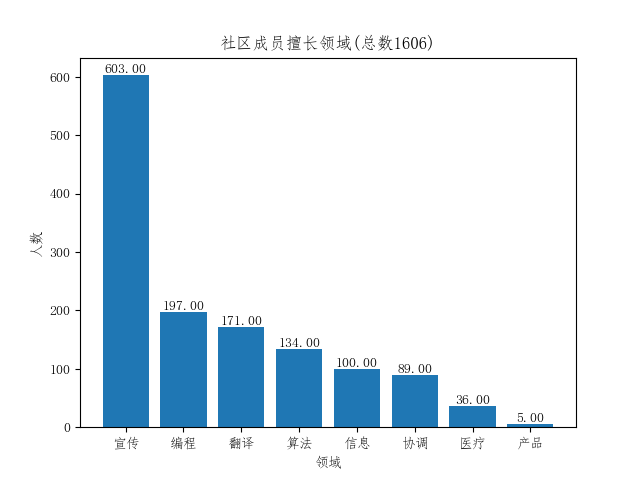

Text(0.5, 0, '领域')

In [332]:
#画柱状图
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams['font.sans-serif'] = ['FangSong'] 
plt.rcParams['axes.unicode_minus'] = False 
for x, y in zip(dict(prefession_dict.most_common(8)).keys(), dict(prefession_dict.most_common(8)).values()):  # zip是将X，Y1分别传到x,y中，传两个
    plt.text(x, y + 0.05, '%.2f' % y, ha='center', va='bottom')  # ha,va规定坐标表示的点，默认左下
plt.bar(dict(prefession_dict.most_common(8)).keys(), dict(prefession_dict.most_common(8)).values())
plt.title('社区成员擅长领域(总数1606)')
plt.ylabel('人数')
plt.xlabel('领域')

<IPython.core.display.Javascript object>


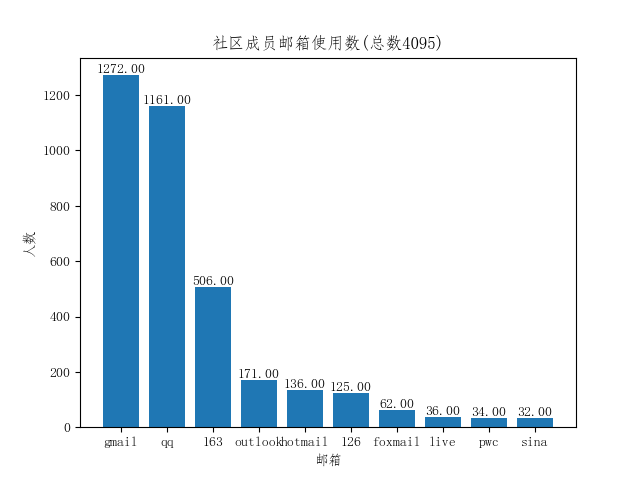

Text(0.5, 0, '邮箱')

In [355]:
#画社区成员使用邮箱数柱状图
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams['font.sans-serif'] = ['FangSong'] 
plt.rcParams['axes.unicode_minus'] = False 
email_dict.most_common(10)
for x, y in zip(dict(email_dict.most_common(10)).keys(), dict(email_dict.most_common(10)).values()):  # zip是将X，Y1分别传到x,y中，传两个
    plt.text(x, y + 0.05, '%.2f' % y, ha='center', va='bottom')  # ha,va规定坐标表示的点，默认左下
plt.bar(dict(email_dict.most_common(10)).keys(), dict(email_dict.most_common(10)).values())
plt.title('社区成员邮箱使用数(总数4095)')
plt.ylabel('人数')
plt.xlabel('邮箱')

<IPython.core.display.Javascript object>


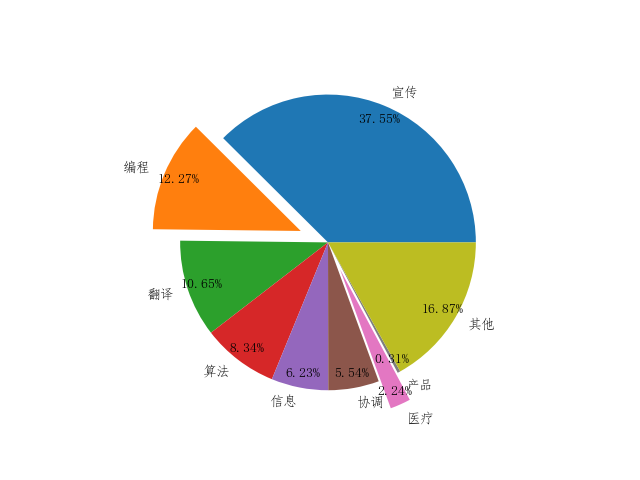

In [344]:
#通过职业画图,为了画 "其他"，方便写法
#data = list(dict(prefession_dict.most_common(8)).keys())
#label = list(dict(prefession_dict.most_common(8)).values())
import matplotlib.pyplot as plt

data = [603, 197, 171, 134, 100, 89, 36, 5, 271]
labels = ['宣传', '编程', '翻译', '算法', '信息', '协调', '医疗', '产品','其他']
plt.pie(data, autopct='%.2f%%',labels=labels,pctdistance=0.9,explode=(0,0.2,0,0,0,0,0.2,0,0))
plt.show()

<IPython.core.display.Javascript object>


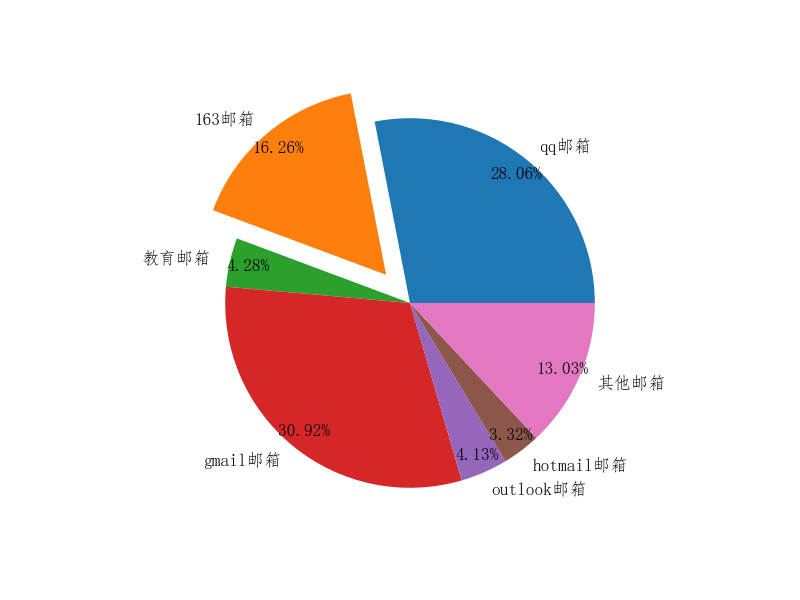

In [96]:
#邮箱数据统计，数据总数4095
import matplotlib.pyplot as plt

data = [1148, 665, 175, 1265, 169, 136, 533]
labels = ["qq邮箱","163邮箱","教育邮箱","gmail邮箱","outlook邮箱","hotmail邮箱","其他邮箱"]
plt.pie(data, autopct='%.2f%%',labels=labels,pctdistance=0.9,explode=(0,0.2,0,0,0,0,0))
plt.show()

# 其他程序

In [9]:
#1对1字典转为1对多字典
stu_list = []
for students in other_dict:
    stu_list.append(students)
students_dict_new = {other_dict[students]:stu_list}

TypeError: unhashable type: 'list'

In [350]:
#提取list当中的邮箱名
all_email = email_status.keys()
company_suffix = []
for email in all_email:
    flag = False
    company = ''
    try:
        for em in email:
            if em == "@":
                flag = True
                continue
            elif (flag == True)&(em != "."):
                company += em
            elif (em == "."):
                if (flag == True):
                    flag = False
                    company_suffix.append(company)
                    break
    except:
        continue

In [178]:
#计算已领取的邮箱的邮箱个数
stauts_gmail = 0
stauts_qq = 0
stauts_163 = 0
stauts_outlook = 0
stauts_hotmail = 0
stauts_126 = 0
for email in email_status.keys():
    if (email_status[email] == 4):
        if "gmail" in str(email):
            stauts_gmail += 1
        elif "qq" in str(email):
            stauts_qq += 1
        elif "163" in str(email):
            stauts_163 += 1
        elif "outlook" in str(email):
            stauts_outlook += 1
        elif "hotmail" in str(email):
            stauts_hotmail += 1
        elif "126" in str(email):
            stauts_126 += 1